In [1]:
import pandas as pd
import csv
import re
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#spacy------------------------------
import spacy
# print('spaCy Version: %s' % (spacy.__version__))  # spaCy Version: 2.3.2
import en_core_web_sm
import en_core_web_lg
from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.symbols import PUNCT, NUM, AUX, X, CONJ, ADJ, VERB, PART, SPACE, CCONJ,INTJ,NOUN
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
nlp = spacy.load('en_core_web_lg')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords = spacy_stopwords.union({
    'easy', 'long', 'nice', 'tasty','white','dry','little','simple',
    'great', 'good','username','text','oz','sure'})

In [3]:
print('First ten stop words: %s' % list(spacy_stopwords)[:])
print(len(spacy_stopwords))

First ten stop words: ['front', 'amongst', 'some', 'by', 'next', 'unless', 'somehow', 'our', 'besides', 'itself', 'these', 'good', '’ll', 'any', 'anywhere', 'more', 'cannot', 'then', 'latterly', 'how', 'over', 'us', 'whoever', 'the', 'hers', 'alone', 'whole', 'keep', 'beforehand', 'sometimes', 'ours', 'enough', 'now', 'even', 'third', 'used', 'great', 'you', 'from', 'afterwards', 'each', 'serious', 'thereafter', 'mostly', 'off', 'another', 'just', '‘m', 'them', 'show', 'wherein', 'him', '’ve', 'yet', 'will', 'every', 'back', 'last', 'nice', 'her', 'yours', 'became', 'does', 'eight', 'fifty', 'onto', 'hundred', 'themselves', 'call', 'first', 'neither', 'give', 'name', 'ever', 'white', 'may', 'two', 'thru', 'also', 'since', 'until', 'is', 'really', 'however', 'about', 'oz', 'has', 'against', "'d", 'whence', 'twelve', 'none', 'once', 'am', 'either', '’m', 'never', 'much', 'himself', 'sometime', 'nevertheless', 'text', 'namely', 'whereafter', 'towards', 'were', 'tasty', 'before', 'therein'

In [4]:
df = pd.read_csv(r'.\cocktail_all_08924_class_combine.csv',encoding='utf-8-sig')  #cocktail_all_combine
df['mix'] = '['+ df['ins'].map(str)+']' +df['comment'].map(str)+'\r''\r'+ df['Vodka'].map(str)+'\r'+ df['Rum'].map(str)+'\r'+ df['Gin'].map(str)+'\r'+ df['Tequila'].map(str)+'\r'+'\r'+''+ df['Whiskey'].map(str)+'\r'+'\r'+ df['Brandy'].map(str)+'\r'+ df['liqueur'].map(str)+']'
# print(df['mix'])
# df['mix'] = '['+ df['ins'].map(str)+']' +df['comment'].map(str)+'\r'+'\r'+df['favor'].map(str)+'\r''\r'+ df['Vodka'].map(str)+'\r'+ df['Rum'].map(str)+'\r'+ df['Gin'].map(str)+'\r'+ df['Tequila'].map(str)+'\r'+'\r'+''+ df['Whiskey'].map(str)+'\r'+'\r'+ df['Brandy'].map(str)+'\r'+ df['liqueur'].map(str)+']'
#
dff = df[df['mix'] != '[nan]nannannannannannannannan']
data = list(dff['mix'])
# print(data)
data_i = [i.lower().replace('nan','').strip().strip('\r').strip('\\').strip('\t') for i in data if len(i) != 0]
# print(data_i)
remove_chars = '[0-9’!"#$%&()*+-./:;<=>?@，。?★、…【】\'\r《》？“”‘’！\\\\[\\]^_`{|}~]+' #移除數字及特殊符號
remove = [re.sub(remove_chars, '' , i) for i in data_i]
text = [re.compile('').sub('', i)for i in remove]
# # text = [re.compile('').sub('', i)for i in remove if len(i) != 0] #移除空格
# print(text)
#
# # print(index)
name = list(dff['name'])
print(name[:20])

["Bobby Burns (Difford's own)", 'Garibaldi', 'The Broady', 'Hesitation ', 'Japanese Slipper', 'Manhattan (Perfect)', 'Petanque cocktail', "Archibald's Last Memory Cocktail", 'Hot Buttered Rum Cocktail', "Auntie's Hot Xmas Punch", 'Jockey Club', 'Barracuda', 'Marsala Martini', 'Sidecar (classic spec.)', 'Negroni Cocktail', 'Slow Comfortable Screw Between the Sheets', 'China Blue', 'Old Cuban Highball', 'Eggs-cellent', 'Olympic']


In [5]:

##-----------------------------查看資訊-------------------------

for token in nlp(str(text[1:100])):
    if  token.pos_ == 'INTJ' or  token.pos_ == 'INTJ':
        print('token.text:',token.text,'token.lemma_:',token.lemma_,'token.pos_:',token.pos_,'token.tag_:',token.tag_,'token.is_stop:',token.is_stop)

#     print('token.text:',token.text,'token.lemma_:',token.lemma_,'token.pos_:',token.pos_,'token.tag_:',token.tag_,
#     'token.dep_:',token.dep_,'token.shape_:', token.shape_,'token.is_alpha:',token.is_alpha,'token.is_stop:',token.is_stop)
#     print()


token.text: ï¿½ï¿½menacingï¿½ï¿½ token.lemma_: ï¿½ï¿½menacingï¿½ï¿½ token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: yeah token.lemma_: yeah token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: unknownï¿½ï¿½ token.lemma_: unknownï¿½ï¿½ token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: lilï¿½ï¿½ token.lemma_: lilï¿½ï¿½ token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: please token.lemma_: please token.pos_: INTJ token.tag_: UH token.is_stop: True
token.text: um token.lemma_: um token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: welcome token.lemma_: welcome token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: ok token.lemma_: ok token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: oh token.lemma_: oh token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: wow token.lemma_: wow token.pos_: INTJ token.tag_: UH token.is_stop: False
token.text: please token.lemma_: please token.pos_: INT

In [6]:
lemma_data = []
for idx, item in enumerate(text):
    doc = nlp(item)  # --> set the document vocab
    doc_spacy = Doc(doc.vocab, words=[t.text for t in doc]) #vocab：詞彙表
    token_lemma_data = [token.lemma_ for token in doc_spacy if not token.is_stop]

    # print(token_lemma_data)
    lemma_data.append(token_lemma_data)
corpus = [str(item).strip().replace('\\','').replace('\t','') for item in lemma_data if len(str(item)) > 1]
print('corpus',corpus[:20])

corpus ["['lemon', 'zest', 'twist', 'discard', ' ', 'slice', 'shortbreadwhat', 'terrific', 'cocktail', 'not', 'try', 'shortbread', 'great', 'lemon', 'twistwhiskey']", "['orange', 'wedge', 'rest', 'rimusing', 'milk', 'frother', 'aerate', 'orange', 'juice', 'purchase', 'similar', 'breville', 'juicer', 'voila', 'danteperfect', 'garibaldi', 'home', 'juice', 'piller', 'elbow', 'not', 'throw', 'juice', 'achieve', 'fluffinessliqueur']", "['agave', 'influence', 'riff', 'blood', ' ', 'sand', 'cherry', 'orange', 'lace', 'tequila', 'smoky', 'hint', 'mezcali', 'know', 'exactly', 'mr', 'broad', 'mean', 'think', 'come', 'mind', 'ï¿½ï¿½menacingï¿½ï¿½', 'think', 'itï¿½ï¿½s', 'mezcal', 'underlie', 'delicious', 'menacingliqueur']", "['lightly', 'spice', 'slightly', 'sweet', 'sidenice', 'sweet', 'sour', 'balance', 'sugar', 'syrupwhiskeyliqueur']", "['sweet', 'melon', 'orange', 'liqueur', 'lemon', 'bite', 'sweetie', 'lurid', 'green', 'colour', 'suggestinterested', 'tequila', 'like', ' ', 'will', 'like', '

In [7]:
# text='[Complex and wonderfully sweet and sour mix. The orange undertone really calms the tequila and the Amaretto marries well with the lime]'
pos_data =[]
for n, item in enumerate(text):
    doc = nlp(item)

    adj_token = [token.lemma_ for token in doc if token.pos_ == 'ADJ' or token.pos_ == 'NOUN'or token.pos_ == 'PROPN'] #or token.pos_ == 'NOUN'or token.pos_ == 'PROPN'
    pos_data.append(adj_token)

pos = [str(item).strip().replace('\\','').replace('\t','') for item in pos_data if len(str(item)) > 1]
print('pos',pos)

pos ["['lemon', 'zest', 'twist', 'slice', 'shortbreadwhat', 'terrific', 'cocktail', 'shortbread', 'great', 'lemon', 'twistwhiskey']", "['orange', 'wedge', 'milk', 'frother', 'orange', 'juice', 'same', 'similar', 'breville', 'juicer', 'garibaldi', 'home', 'piller', 'elbow', 'juice', 'fluffinessliqueur']", "['agave', 'riff', 'blood', 'sand', 'cherry', 'orange', 'tequila', 'smoky', 'hint', 'mezcali', 'mr', 'broad', 'first', 'thought', 'mind', 'mezcal', 'delicious', 'menacingliqueur']", "['sweet', 'sidenice', 'sweet', 'sour', 'balance', 'sugar', 'syrupwhiskeyliqueur']", "['sweet', 'melon', 'orange', 'liqueur', 'lemon', 'bit', 'sweetie', 'lurid', 'green', 'colour', 'tequila', 'japanese', 'slipper', 'thank', 'attention', 'photo', 'salt', 'rim', 'previous', 'version', 'margaritalike', 'variationliqueur']", "['orange', 'zest', 'twist', 'luxardo', 'maraschino', 'cherryafter', 'lot', 'experimentation', 'science', 'goto', 'favorite', 'manhattanwhiskey']", "['game', 'drink', 'french', 'main', 'ing

In [8]:
 # # ---------------------------------------------------------------
# # # # # 計算單字次數：
vect = CountVectorizer(token_pattern='(?u)\\b\\w\\w+\\b',stop_words=spacy_stopwords,min_df=0.008)#,max_df=0.99,min_df=0.01)
x_train = vect.fit_transform(pos)
feature = vect.get_feature_names()
print(feature)

c:\users\big data\anaconda3\envs\heart\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['apple', 'balance', 'balanced', 'bar', 'bit', 'bitter', 'bittersweet', 'bourbon', 'brandy', 'campari', 'cherry', 'chocolate', 'citrus', 'classic', 'cocktail', 'cognac', 'complex', 'dan', 'dash', 'delicious', 'different', 'drink', 'drunklab', 'flavor', 'flavour', 'fresh', 'fruit', 'fruity', 'gin', 'ginbrandy', 'ginger', 'ginliqueur', 'glass', 'grapefruit', 'herbal', 'hint', 'ice', 'ingredient', 'interesting', 'juice', 'lemon', 'light', 'lime', 'liqueur', 'lot', 'maraschino', 'martini', 'new', 'note', 'old', 'orange', 'original', 'pearson', 'pineapple', 'place', 'recipe', 'refreshing', 'rich', 'riff', 'rum', 'rumbrandy', 'rumgin', 'rumliqueur', 'rye', 'sour', 'spirit', 'strong', 'subtle', 'sugar', 'sweet', 'sweetness', 'syrup', 'taste', 'tequila', 'thank', 'thing', 'time', 'twist', 'variation', 'vermouth', 'version', 'vodka', 'way', 'whiskey', 'year', 'zachary', '½ï']


In [9]:
# # # # # #------------dataframe貯存---------------------
count_feature = pd.DataFrame(x_train.toarray(), columns=feature, index=name)
print('dataframe:',count_feature)
# count_feature.to_csv(r'./cocktail/tfidf/mix_pos_feature_matrix_0824.csv', encoding='utf-8-sig')

dataframe:                                apple  balance  balanced  bar  bit  bitter  \
Bobby Burns (Difford's own)        0        0         0    0    0       0   
Garibaldi                          0        0         0    0    0       0   
The Broady                         0        0         0    0    0       0   
Hesitation                         0        1         0    0    0       0   
Japanese Slipper                   0        0         0    0    1       0   
...                              ...      ...       ...  ...  ...     ...   
Yesterday, Today and Amaro         0        0         0    0    0       0   
Youngstown Tube                    0        0         0    0    0       0   
You Have A Drink Named Steve?      0        0         0    0    0       0   
Your Second Cousin                 0        0         0    0    0       0   
You Only Live Twice                0        0         0    0    0       1   

                               bittersweet  bourbon  brandy  cam

In [10]:
# # # #計算tfidf權重--------------------------------------
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(x_train)
weight = tfidf_matrix.toarray()
# # # #------------dataframe貯存---------------------
tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=feature,index=name)
print('tfidf_matrix:',tfidf)
tfidf.to_csv(r'./tfidfmatrix.csv', encoding='utf-8-sig')

tfidf_matrix:                                apple  balance  balanced  bar       bit  \
Bobby Burns (Difford's own)      0.0  0.00000       0.0  0.0  0.000000   
Garibaldi                        0.0  0.00000       0.0  0.0  0.000000   
The Broady                       0.0  0.00000       0.0  0.0  0.000000   
Hesitation                       0.0  0.46515       0.0  0.0  0.000000   
Japanese Slipper                 0.0  0.00000       0.0  0.0  0.387454   
...                              ...      ...       ...  ...       ...   
Yesterday, Today and Amaro       0.0  0.00000       0.0  0.0  0.000000   
Youngstown Tube                  0.0  0.00000       0.0  0.0  0.000000   
You Have A Drink Named Steve?    0.0  0.00000       0.0  0.0  0.000000   
Your Second Cousin               0.0  0.00000       0.0  0.0  0.000000   
You Only Live Twice              0.0  0.00000       0.0  0.0  0.000000   

                                 bitter  bittersweet  bourbon  brandy  \
Bobby Burns (Difford's o

In [11]:
# 数据标准化-------------------------------------------------
from sklearn import preprocessing

'''
preprocessing.scale()是按照列进行标准化计算，计算公式为:
(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
(X_train[:,0]-np.mean(X_train[:,0]))/np.std(X_train[:,0])//或者
'''
X_scaled = preprocessing.scale(weight)  # scale操作之后的数据零均值，单位方差（方差为1）
print(X_scaled)
print('#-----------------------------------')

[[-0.09731864 -0.08070759 -0.08124861 ... -0.08309731 -0.14731325
  -0.10988797]
 [-0.09731864 -0.08070759 -0.08124861 ... -0.08309731 -0.14731325
  -0.10988797]
 [-0.09731864 -0.08070759 -0.08124861 ... -0.08309731 -0.14731325
  -0.10988797]
 ...
 [-0.09731864 -0.08070759 -0.08124861 ... -0.08309731 -0.14731325
  -0.10988797]
 [-0.09731864 -0.08070759 -0.08124861 ... -0.08309731 -0.14731325
  -0.10988797]
 [-0.09731864 -0.08070759 -0.08124861 ... -0.08309731 -0.14731325
  -0.10988797]]
#-----------------------------------


In [12]:
# # 进行PCA数据降维
from sklearn.decomposition import PCA
#
# # 生成PCA实例
pca = PCA(n_components=3)  # 把维度降至3维
# # 进行PCA降维
X_pca = pca.fit_transform(X_scaled)
print(X_pca)
# # 生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3'])  # 原始数据由(30000, 7)降维至(30000, 3)
print(X_pca_frame)


[[ 1.37597355 -1.71989869 -1.26262058]
 [ 1.77236386 -1.65564961 -2.36262312]
 [ 1.15471762 -2.12779673 -2.4085819 ]
 ...
 [-1.06015372  0.53445477  0.2323167 ]
 [-0.73069555  0.28441219  0.07637498]
 [ 4.73952235 -3.0798496   2.10092485]]
          pca_1     pca_2     pca_3
0      1.375974 -1.719899 -1.262621
1      1.772364 -1.655650 -2.362623
2      1.154718 -2.127797 -2.408582
3      2.380300 -3.192314 -1.583860
4      4.033803  0.534948 -0.997001
...         ...       ...       ...
22481  3.248960 -1.418068  1.531237
22482 -0.730696  0.284412  0.076375
22483 -1.060154  0.534455  0.232317
22484 -0.730696  0.284412  0.076375
22485  4.739522 -3.079850  2.100925

[22486 rows x 3 columns]


In [13]:
# # # # # #--------------------kmeans--------------------------------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# # #
from sklearn.manifold import TSNE
# # 指定分成5个类
clf = KMeans(n_clusters=11)
kmean = clf.fit(X_pca)#開始訓練！
print(kmean.cluster_centers_)
# # 打印出各个族的中心点
for index ,label in enumerate(kmean.labels_,1):
    print('index:{},label:{}'.format(index,label))
# # 样本距其最近的聚类中心的平方距离之和，用来评判分类的准确度，值越小越好
# # k-means的超参数n_clusters可以通过该值来评估
print("inertia: {}".format(kmean.inertia_))
# # #


[[ 0.30351743 -1.03853021 -1.28405027]
 [ 7.33047887 10.00075846 -2.13038041]
 [ 2.25177721 -2.0743965  -1.47388606]
 [-0.89058568  0.38686875  0.12530534]
 [ 4.04888839 -2.16911936  3.64593949]
 [ 5.97948279  0.88685963  0.4004262 ]
 [ 3.3617005  -2.2883533   0.73089374]
 [ 6.28582854  5.16212493 -0.9615927 ]
 [ 1.83001804 -0.83601906  2.97034894]
 [ 0.89371438 -0.83885697  0.85364818]
 [ 0.77956225 -1.64256068 -3.32842336]]
index:1,label:2
index:2,label:2
index:3,label:10
index:4,label:2
index:5,label:5
index:6,label:2
index:7,label:8
index:8,label:0
index:9,label:0
index:10,label:10
index:11,label:10
index:12,label:2
index:13,label:6
index:14,label:8
index:15,label:2
index:16,label:2
index:17,label:10
index:18,label:3
index:19,label:0
index:20,label:10
index:21,label:0
index:22,label:6
index:23,label:6
index:24,label:2
index:25,label:8
index:26,label:6
index:27,label:9
index:28,label:3
index:29,label:6
index:30,label:2
index:31,label:8
index:32,label:0
index:33,label:9
index:34,labe

index:2169,label:10
index:2170,label:9
index:2171,label:0
index:2172,label:0
index:2173,label:0
index:2174,label:3
index:2175,label:9
index:2176,label:0
index:2177,label:3
index:2178,label:0
index:2179,label:10
index:2180,label:0
index:2181,label:9
index:2182,label:2
index:2183,label:8
index:2184,label:0
index:2185,label:3
index:2186,label:3
index:2187,label:2
index:2188,label:0
index:2189,label:2
index:2190,label:10
index:2191,label:3
index:2192,label:3
index:2193,label:10
index:2194,label:10
index:2195,label:10
index:2196,label:10
index:2197,label:10
index:2198,label:0
index:2199,label:10
index:2200,label:0
index:2201,label:0
index:2202,label:10
index:2203,label:0
index:2204,label:10
index:2205,label:0
index:2206,label:9
index:2207,label:0
index:2208,label:3
index:2209,label:2
index:2210,label:10
index:2211,label:10
index:2212,label:0
index:2213,label:0
index:2214,label:10
index:2215,label:10
index:2216,label:10
index:2217,label:3
index:2218,label:0
index:2219,label:0
index:2220,labe

index:4082,label:6
index:4083,label:0
index:4084,label:0
index:4085,label:0
index:4086,label:0
index:4087,label:2
index:4088,label:9
index:4089,label:0
index:4090,label:10
index:4091,label:3
index:4092,label:9
index:4093,label:9
index:4094,label:9
index:4095,label:0
index:4096,label:2
index:4097,label:0
index:4098,label:0
index:4099,label:9
index:4100,label:10
index:4101,label:0
index:4102,label:3
index:4103,label:9
index:4104,label:3
index:4105,label:9
index:4106,label:10
index:4107,label:10
index:4108,label:3
index:4109,label:6
index:4110,label:2
index:4111,label:0
index:4112,label:0
index:4113,label:3
index:4114,label:3
index:4115,label:2
index:4116,label:9
index:4117,label:3
index:4118,label:0
index:4119,label:6
index:4120,label:10
index:4121,label:10
index:4122,label:10
index:4123,label:3
index:4124,label:4
index:4125,label:0
index:4126,label:4
index:4127,label:9
index:4128,label:0
index:4129,label:0
index:4130,label:8
index:4131,label:6
index:4132,label:0
index:4133,label:9
index

index:6575,label:3
index:6576,label:3
index:6577,label:3
index:6578,label:3
index:6579,label:3
index:6580,label:3
index:6581,label:3
index:6582,label:3
index:6583,label:3
index:6584,label:3
index:6585,label:3
index:6586,label:3
index:6587,label:3
index:6588,label:3
index:6589,label:3
index:6590,label:3
index:6591,label:3
index:6592,label:3
index:6593,label:3
index:6594,label:3
index:6595,label:3
index:6596,label:3
index:6597,label:3
index:6598,label:3
index:6599,label:3
index:6600,label:3
index:6601,label:3
index:6602,label:3
index:6603,label:3
index:6604,label:3
index:6605,label:3
index:6606,label:3
index:6607,label:3
index:6608,label:3
index:6609,label:3
index:6610,label:3
index:6611,label:3
index:6612,label:3
index:6613,label:3
index:6614,label:3
index:6615,label:3
index:6616,label:3
index:6617,label:3
index:6618,label:3
index:6619,label:3
index:6620,label:3
index:6621,label:3
index:6622,label:3
index:6623,label:3
index:6624,label:3
index:6625,label:3
index:6626,label:3
index:6627,l

index:8944,label:3
index:8945,label:3
index:8946,label:3
index:8947,label:3
index:8948,label:3
index:8949,label:3
index:8950,label:3
index:8951,label:3
index:8952,label:3
index:8953,label:3
index:8954,label:3
index:8955,label:3
index:8956,label:3
index:8957,label:3
index:8958,label:3
index:8959,label:3
index:8960,label:3
index:8961,label:3
index:8962,label:3
index:8963,label:3
index:8964,label:3
index:8965,label:3
index:8966,label:3
index:8967,label:3
index:8968,label:3
index:8969,label:3
index:8970,label:3
index:8971,label:3
index:8972,label:3
index:8973,label:3
index:8974,label:3
index:8975,label:3
index:8976,label:3
index:8977,label:3
index:8978,label:3
index:8979,label:3
index:8980,label:3
index:8981,label:3
index:8982,label:3
index:8983,label:3
index:8984,label:3
index:8985,label:3
index:8986,label:3
index:8987,label:3
index:8988,label:3
index:8989,label:3
index:8990,label:3
index:8991,label:3
index:8992,label:3
index:8993,label:3
index:8994,label:3
index:8995,label:3
index:8996,l

index:11330,label:3
index:11331,label:3
index:11332,label:3
index:11333,label:3
index:11334,label:3
index:11335,label:3
index:11336,label:3
index:11337,label:3
index:11338,label:3
index:11339,label:3
index:11340,label:3
index:11341,label:3
index:11342,label:3
index:11343,label:3
index:11344,label:3
index:11345,label:3
index:11346,label:3
index:11347,label:3
index:11348,label:3
index:11349,label:3
index:11350,label:3
index:11351,label:3
index:11352,label:3
index:11353,label:3
index:11354,label:3
index:11355,label:3
index:11356,label:3
index:11357,label:3
index:11358,label:3
index:11359,label:3
index:11360,label:3
index:11361,label:3
index:11362,label:3
index:11363,label:3
index:11364,label:3
index:11365,label:3
index:11366,label:3
index:11367,label:3
index:11368,label:3
index:11369,label:3
index:11370,label:3
index:11371,label:3
index:11372,label:3
index:11373,label:3
index:11374,label:3
index:11375,label:3
index:11376,label:3
index:11377,label:3
index:11378,label:3
index:11379,label:3


index:13611,label:3
index:13612,label:3
index:13613,label:3
index:13614,label:3
index:13615,label:3
index:13616,label:3
index:13617,label:3
index:13618,label:3
index:13619,label:3
index:13620,label:3
index:13621,label:3
index:13622,label:3
index:13623,label:3
index:13624,label:3
index:13625,label:3
index:13626,label:3
index:13627,label:3
index:13628,label:3
index:13629,label:3
index:13630,label:3
index:13631,label:3
index:13632,label:3
index:13633,label:3
index:13634,label:3
index:13635,label:3
index:13636,label:3
index:13637,label:3
index:13638,label:3
index:13639,label:3
index:13640,label:3
index:13641,label:3
index:13642,label:3
index:13643,label:3
index:13644,label:3
index:13645,label:3
index:13646,label:3
index:13647,label:3
index:13648,label:3
index:13649,label:3
index:13650,label:3
index:13651,label:3
index:13652,label:3
index:13653,label:3
index:13654,label:3
index:13655,label:3
index:13656,label:3
index:13657,label:3
index:13658,label:3
index:13659,label:3
index:13660,label:3


index:16030,label:3
index:16031,label:3
index:16032,label:9
index:16033,label:3
index:16034,label:9
index:16035,label:6
index:16036,label:4
index:16037,label:6
index:16038,label:8
index:16039,label:3
index:16040,label:3
index:16041,label:7
index:16042,label:3
index:16043,label:0
index:16044,label:3
index:16045,label:3
index:16046,label:3
index:16047,label:3
index:16048,label:3
index:16049,label:9
index:16050,label:3
index:16051,label:3
index:16052,label:0
index:16053,label:3
index:16054,label:7
index:16055,label:3
index:16056,label:9
index:16057,label:9
index:16058,label:0
index:16059,label:3
index:16060,label:3
index:16061,label:3
index:16062,label:1
index:16063,label:9
index:16064,label:3
index:16065,label:9
index:16066,label:4
index:16067,label:7
index:16068,label:8
index:16069,label:3
index:16070,label:3
index:16071,label:3
index:16072,label:5
index:16073,label:3
index:16074,label:3
index:16075,label:3
index:16076,label:6
index:16077,label:4
index:16078,label:3
index:16079,label:3


index:18328,label:3
index:18329,label:9
index:18330,label:9
index:18331,label:3
index:18332,label:9
index:18333,label:9
index:18334,label:2
index:18335,label:3
index:18336,label:3
index:18337,label:3
index:18338,label:3
index:18339,label:8
index:18340,label:4
index:18341,label:5
index:18342,label:2
index:18343,label:4
index:18344,label:3
index:18345,label:3
index:18346,label:9
index:18347,label:3
index:18348,label:3
index:18349,label:3
index:18350,label:3
index:18351,label:6
index:18352,label:5
index:18353,label:9
index:18354,label:7
index:18355,label:3
index:18356,label:5
index:18357,label:3
index:18358,label:3
index:18359,label:3
index:18360,label:3
index:18361,label:1
index:18362,label:3
index:18363,label:7
index:18364,label:3
index:18365,label:6
index:18366,label:3
index:18367,label:3
index:18368,label:3
index:18369,label:5
index:18370,label:3
index:18371,label:3
index:18372,label:3
index:18373,label:3
index:18374,label:5
index:18375,label:1
index:18376,label:3
index:18377,label:6


index:20653,label:3
index:20654,label:3
index:20655,label:3
index:20656,label:3
index:20657,label:6
index:20658,label:3
index:20659,label:3
index:20660,label:8
index:20661,label:6
index:20662,label:6
index:20663,label:3
index:20664,label:9
index:20665,label:3
index:20666,label:3
index:20667,label:3
index:20668,label:3
index:20669,label:3
index:20670,label:3
index:20671,label:5
index:20672,label:3
index:20673,label:2
index:20674,label:3
index:20675,label:5
index:20676,label:6
index:20677,label:3
index:20678,label:8
index:20679,label:7
index:20680,label:3
index:20681,label:9
index:20682,label:7
index:20683,label:5
index:20684,label:3
index:20685,label:3
index:20686,label:3
index:20687,label:7
index:20688,label:0
index:20689,label:3
index:20690,label:3
index:20691,label:3
index:20692,label:3
index:20693,label:7
index:20694,label:3
index:20695,label:5
index:20696,label:3
index:20697,label:9
index:20698,label:7
index:20699,label:2
index:20700,label:3
index:20701,label:3
index:20702,label:3


Org data dimension is 87.Embedded data dimension is 3


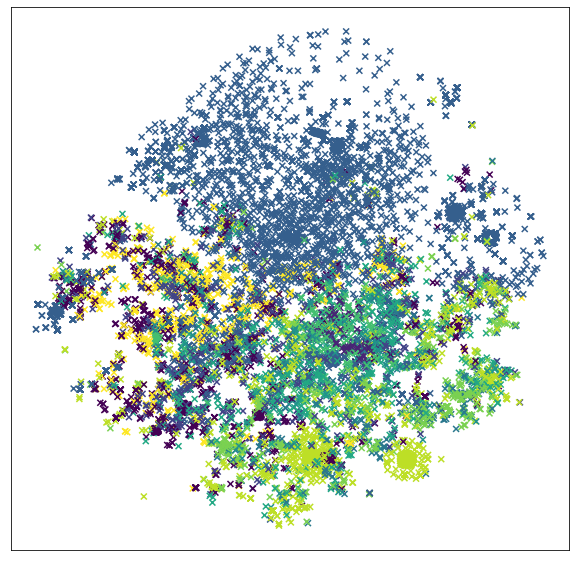

<Figure size 432x288 with 0 Axes>

In [14]:
# # # 使用T-SNE算法，对权重进行降维，准确度比PCA算法高，但是耗时长
tsne = TSNE(n_components=3,init='pca', random_state=501) #嵌入空间的维度
decomposition_data = tsne.fit_transform(weight)
print("Org data dimension is {}.Embedded data dimension is {}".format(weight.shape[-1], decomposition_data.shape[-1]))
#
x = []
y = []
# #
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
#
# print(x)
# print(y)
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=kmean.labels_, marker="x")
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig('./sample.png')

In [15]:
# ####--------------------LDA 狄利克雷分布 找出潛在主題-------------------------------------
from sklearn.decomposition import LatentDirichletAllocation
vect_lda= CountVectorizer(stop_words=spacy_stopwords,max_df=0.15)
x = vect_lda.fit_transform(pos)
# print(x)
n_components = 11
lda = LatentDirichletAllocation(n_components=n_components,learning_method="batch",max_iter=50,random_state=0)
document_topics = lda.fit_transform(x)
shape = lda.components_.shape


# 打印每个主题下权重较高的term
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print( "Topic #%d:" % topic_idx)
        print( " ".join([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
        #打印主题-词语分布矩阵
        # print(model.components_)

n_top_words=10
tf_feature_names = vect_lda.get_feature_names()
# print(tf_feature_names )
top_word = print_top_words(lda, tf_feature_names, n_top_words)
# print(top_word)

c:\users\big data\anaconda3\envs\heart\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0:
whiskey ½ï cocktail ½s rich bittersweet flavour fruit citrus note

Topic #1:
liqueur tequila apricot coffee vodkagin vodkaliqueur tequilaliqueur drink chocolate apple

Topic #2:
cocktail cherry maraschino drink absinthe herbal flavour brandyliqueur riff pisco

Topic #3:
bitter brandy drink sweet cocktail vermouth orange rye recipe dash

Topic #4:
juice cocktail drink lime sugar syrup orange lemon glass recipe

Topic #5:
rum ginliqueur cocktail rumliqueur vodkarumgin colour whiskeyliqueur reminiscent green jamaican

Topic #6:
zachary pearson cocktail recipe drink thank syrup egg instruction note

Topic #7:
gin drink rumliqueur rumbrandy vodkarum tom original sloe recipe botanical

Topic #8:
cocktail drink ginger lemon juice chartreuse syrup sweet lime pineapple

Topic #9:
fruity sweet rumgin orange hint ginbrandy refreshing zest lemon twist

Topic #10:
vodka drink cocktail taste summer refreshing baileys bar time shot

